In [170]:
import pandas as pd
import numpy as np
import seaborn as sns

import statistics
from pathlib import Path   #for file loading
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Data

In [178]:
csv = str(Path('C:/Users/Yulia/anaconda projects/pet_projects/spaceship/data/train.csv'))
train_data = pd.read_csv(csv)
print(train_data.shape)
train_data.head(1)

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


In [179]:
csv = str(Path('C:/Users/Yulia/anaconda projects/pet_projects/spaceship/data/test.csv'))
test_data = pd.read_csv(csv)
print(test_data.shape)
test_data.head(1)

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning


# Researching

In [180]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [181]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [182]:
# to split train datas
train_data[['Passenger_trav_group', 'PassengerId_in_group']] = train_data['PassengerId'].str.split('_0', n=1, expand=True)

train_data[['Deck_num', 'Room_num', 'Bord_side']] = train_data['Cabin'].str.split('/', n=2, expand=True)
train_data['Bord_side'] = train_data['Bord_side'].apply(lambda x: 'left' if x == 'P' else ('right' if x == 'S' else np.nan))

train_data[['First_name', 'Last_name']] = train_data['Name'].str.split(' ', n=1, expand=True)

# to split test datas
test_data[['Passenger_trav_group', 'PassengerId_in_group']] = test_data['PassengerId'].str.split('_0', n=1, expand=True)

test_data[['Deck_num', 'Room_num', 'Bord_side']] = test_data['Cabin'].str.split('/', n=2, expand=True)
test_data['Bord_side'] = test_data['Bord_side'].apply(lambda x: 'left' if x == 'P' else ('right' if x == 'S' else np.nan))

test_data[['First_name', 'Last_name']] = test_data['Name'].str.split(' ', n=1, expand=True)

In [228]:
# new frame with splited columns
spl_train_data = train_data[['Passenger_trav_group','PassengerId_in_group',
                             'HomePlanet','CryoSleep',
                             'Deck_num','Room_num','Bord_side',
                             'Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck',
                             'First_name','Last_name',
                             'Transported']]

spl_test_data = test_data[['Passenger_trav_group','PassengerId_in_group',
                             'HomePlanet','CryoSleep',
                             'Deck_num','Room_num','Bord_side',
                             'Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck',
                             'First_name','Last_name']]

## NANS train_data

HomePlanet

In [229]:
spl_train_data['HomePlanet'] = spl_train_data['HomePlanet'].apply(lambda x: 'Earth' if x == 'Europa' else x)

C:\Users\Yulia\AppData\Local\Temp\ipykernel_30068\3377274828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl_train_data['HomePlanet'] = spl_train_data['HomePlanet'].apply(lambda x: 'Earth' if x == 'Europa' else x)


In [230]:
# family members are living at the same planet

spl_train_data['Passenger_trav_group'] = spl_train_data['Passenger_trav_group'].apply(lambda x: int(x))

miss_val = spl_train_data[spl_train_data['HomePlanet'].isna()]['Passenger_trav_group'].unique()
for i in miss_val:
    #take populariest value or (if values are similar) random
    pop_val = spl_train_data[(~spl_train_data['HomePlanet'].isna()) & 
                             (spl_train_data['Passenger_trav_group']==i)]['HomePlanet'].value_counts()
    if len(pop_val) > 0:
        spl_train_data.loc[(spl_train_data['HomePlanet'].isna()) & 
                           (spl_train_data['Passenger_trav_group']==i), 'HomePlanet'] = pop_val.index[0]
    else:
        spl_train_data.loc[spl_train_data['HomePlanet'].isna() & 
                           (spl_train_data['Passenger_trav_group']==i), 'HomePlanet'] = 'Earth'   # the most popular in dataframe

C:\Users\Yulia\AppData\Local\Temp\ipykernel_30068\2231565774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl_train_data['Passenger_trav_group'] = spl_train_data['Passenger_trav_group'].apply(lambda x: int(x))


CryoSleep

In [231]:
spl_train_data[spl_train_data['CryoSleep'] == False]['FoodCourt'].unique()

array([   0.,    9., 3576., ..., 1146., 6819., 4688.])

In [232]:
spl_train_data[spl_train_data['CryoSleep'] == True]['FoodCourt'].unique()

array([ 0., nan])

In [233]:
# fill food nans, because cryo peoples don't need food
spl_train_data.loc[(spl_train_data['CryoSleep'] == True) & 
                   (spl_train_data['FoodCourt'].isna()), 'FoodCourt'] = 0

In [234]:
spl_train_data.loc[(spl_train_data['CryoSleep'].isna()) & 
                   (~spl_train_data['FoodCourt'].isna()) & 
                   (spl_train_data['FoodCourt'] > 0), 'CryoSleep'] = False

spl_train_data.loc[(spl_train_data['CryoSleep'].isna()) & 
                   (spl_train_data['FoodCourt'] == 0), 'CryoSleep'] = True

In [235]:
spl_train_data['CryoSleep'].value_counts(dropna=False)

False    5518
True     3172
NaN         3
Name: CryoSleep, dtype: int64

In [236]:
# to fill by the populiest value
spl_train_data.loc[spl_train_data['CryoSleep'].isna(), 'CryoSleep'] = False

Deck_num, Room_num and Bord_side

In [237]:
spl_train_data['Room_num'] = spl_train_data['Room_num'].apply(lambda x: x if pd.isnull(x)==True else float(x))

C:\Users\Yulia\AppData\Local\Temp\ipykernel_30068\4214890088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl_train_data['Room_num'] = spl_train_data['Room_num'].apply(lambda x: x if pd.isnull(x)==True else float(x))


In [238]:
# Bord_side might depends on passsenger status or/and cryo sleep availability or/and home planet - Nope

print(spl_train_data[spl_train_data['Bord_side'] == 'right']['VIP'].unique())
print(spl_train_data[spl_train_data['Bord_side'] == 'right']['CryoSleep'].unique())
print(spl_train_data[spl_train_data['Bord_side'] == 'right']['HomePlanet'].unique())

# Maybe it has correlation with passenger characteristics - Nope

print(spl_train_data[spl_train_data['Bord_side'] == 'right']['Destination'].unique())
print(spl_train_data[spl_train_data['Bord_side'] == 'right']['Age'].unique())

[False True nan]
[False True]
['Earth' 'Mars']
['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
[24. 58. 33. 16. 26. 28. 35. 48.  1. 49. 29. 10.  7. 62. 15. 32. 20. 56.
 nan 25.  2. 38. 27. 36. 22.  0. 18. 21. 42. 14. 13. 40. 45. 54.  9.  6.
 23. 31. 67. 61. 19. 47. 50. 57. 17. 37. 11. 51. 41. 30. 60. 39. 43. 59.
 63. 79. 34. 46. 74. 55. 64. 53.  4. 12. 44.  3. 65. 71. 52.  5.  8. 76.
 78. 70. 69. 72. 66. 68. 73.]


In [239]:
spl_train_data['Bord_side'].value_counts(dropna=False)  #if we fill nans by pop value then it may affect to wrong distribution

right    4288
left     4206
NaN       199
Name: Bord_side, dtype: int64

In [240]:
# it can depends on Passenger_trav_group, because family memebers would be checking into same roomes

right_board_pass = sorted(spl_train_data[spl_train_data['Bord_side'] == 'right']['Passenger_trav_group'].unique().tolist())
left_board_pass = sorted(spl_train_data[spl_train_data['Bord_side'] == 'left']['Passenger_trav_group'].unique().tolist())

right_board_pass == left_board_pass

False

In [241]:
spl_train_data.loc[spl_train_data['Bord_side'].isna() & 
                   (spl_train_data['Passenger_trav_group'].isin(right_board_pass)), 'Bord_side'] = 'right'
    
spl_train_data.loc[spl_train_data['Bord_side'].isna() & 
                   (spl_train_data['Passenger_trav_group'].isin(left_board_pass)), 'Bord_side'] = 'left'

In [242]:
spl_train_data[spl_train_data['Bord_side'].isna()]['Passenger_trav_group'].unique()

# some passengers didn't check into room

array([  12,  101,  239,  301,  310,  327,  355,  380,  468,  502,  525,
        715,  732,  826,  833,  879,  932, 1022, 1041, 1095, 1132, 1134,
       1198, 1295, 1545, 1613, 1645, 1718, 1823, 1984, 2117, 2144, 2219,
       2479, 2497, 2513, 2559, 2599, 2692, 2900, 2926, 2970, 3034, 3053,
       3138, 3501, 3553, 3578, 3598, 3751, 3818, 3821, 3976, 3981, 4009,
       4130, 4134, 4167, 4270, 4370, 4397, 4447, 4637, 4652, 4667, 4810,
       5048, 5105, 5436, 5474, 5480, 5508, 5831, 6048, 6265, 6385, 6416,
       6451, 6652, 6898, 6990, 7182, 7236, 7429, 7485, 7746, 7801, 7843,
       7871, 7930, 7983, 7995, 8225, 8374, 8375, 8437, 8603, 8623, 9233],
      dtype=int64)

In [243]:
# find what rooms are missing
rooms_dict = {'A': (),
              'B': (),
              'C': (),
              'D': (),
              'E': (),
              'F': (),
              'G': (),
              'T': ()}

for i in sorted(spl_train_data['Deck_num'].value_counts().index.tolist()):
    deck_rooms_list = sorted(spl_train_data[spl_train_data['Deck_num'] == i]['Room_num'].unique().tolist())
    min_room = int(deck_rooms_list[0])
    max_room = int(deck_rooms_list[-1])
    
    rooms_list = list(range(min_room, max_room+1))
    miss_rooms = sorted(list(set(rooms_list)-set(deck_rooms_list)))
    
    if len(miss_rooms) > 0:
        rooms_dict[i] = miss_rooms

In [244]:
# Let's checking into other passengers

passengers_without_rooms = sorted(spl_train_data[spl_train_data['Room_num'].isna()]['Passenger_trav_group'].unique())

c = 0
for deck in sorted(list(rooms_dict.keys())):
    for room in rooms_dict[deck]:
        if passengers_without_rooms[c] < passengers_without_rooms[-1]:
            pas = passengers_without_rooms[c]
            c += 1
            # fill info
            spl_train_data.loc[(spl_train_data['Passenger_trav_group'] == pas) & 
                               (spl_train_data['Room_num'].isna()) & 
                               (spl_train_data['Deck_num'].isna()), ['Room_num', 'Deck_num']] = room, deck
            
        else:
            pas = passengers_without_rooms[c]
            # fill info
            spl_train_data.loc[(spl_train_data['Passenger_trav_group'] == pas) & 
                               (spl_train_data['Room_num'].isna()) & 
                               (spl_train_data['Deck_num'].isna()), ['Room_num', 'Deck_num']] = room, deck
            break
            
spl_train_data['Room_num'] = spl_train_data['Room_num'].astype(int)

C:\Users\Yulia\AppData\Local\Temp\ipykernel_30068\3950770551.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl_train_data['Room_num'] = spl_train_data['Room_num'].astype(int)


In [245]:
spl_train_data['Bord_side'].value_counts(dropna=False)

right    4343
left     4251
NaN        99
Name: Bord_side, dtype: int64

In [246]:
# drop Bord_side nans (~1%)
spl_train_data =spl_train_data[~spl_train_data['Bord_side'].isna()]

First_name, Last_name

In [247]:
spl_train_data[['First_name', 'Last_name']] = spl_train_data[['First_name', 'Last_name']].fillna('unknown')

Age

In [248]:
# get median Age for every home planet (because people can want to buy ticket like their friends)
med_earth = statistics.median(spl_train_data[spl_train_data['HomePlanet']=='Earth']['Age'].values)
med_mars = statistics.median(spl_train_data[spl_train_data['HomePlanet']=='Mars']['Age'].values)

spl_train_data.loc[(spl_train_data['Age'].isna()) & 
                   (spl_train_data['HomePlanet']=='Earth'), 'Age'] = med_earth

spl_train_data.loc[(spl_train_data['Age'].isna()) & 
                   (spl_train_data['HomePlanet']=='Mars'), 'Age'] = med_mars

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [249]:
sns.set_theme(rc={'figure.figsize':(8,2)})

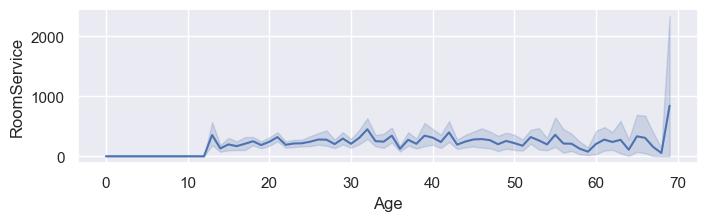

In [250]:
sns.lineplot(spl_train_data[spl_train_data['Age'] < 70], x='Age', y='RoomService')

#passengers from 12 y.o. to 68 y.o. are spending averagely 250 money to RoomService
spl_train_data.loc[(spl_train_data['RoomService'].isna()) & 
                   (spl_train_data['Age'] >= 12) & 
                   (spl_train_data['Age'] <= 68), 'RoomService'] = 250

#passengedr 69+
median_value = statistics.median(spl_train_data[spl_train_data['Age'] >= 69]['RoomService'].values)
spl_train_data.loc[(spl_train_data['RoomService'].isna()) &  
                   (spl_train_data['Age'] >= 69), 'RoomService'] = median_value

#passengedr from 0 to 11
spl_train_data.loc[(spl_train_data['RoomService'].isna()) & 
                   (spl_train_data['Age'] < 12), 'RoomService'] = 0

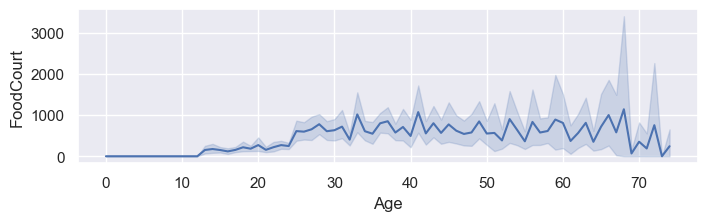

In [251]:
sns.lineplot(spl_train_data[spl_train_data['Age'] < 75], x='Age', y='FoodCourt')

#passengers from 12 y.o. to 68 y.o. are spending averagely 800 money to FoodCourt
spl_train_data.loc[(spl_train_data['FoodCourt'].isna()) & 
                   (spl_train_data['Age'] >= 12) & 
                   (spl_train_data['Age'] <= 68), 'FoodCourt'] = 800

#passengedr 69+
median_value = statistics.median(spl_train_data[spl_train_data['Age'] >= 69]['FoodCourt'].values)
spl_train_data.loc[(spl_train_data['FoodCourt'].isna()) &  
                   (spl_train_data['Age'] >= 69), 'FoodCourt'] = median_value

#passengedr from 0 to 11
spl_train_data.loc[(spl_train_data['FoodCourt'].isna()) & 
                   (spl_train_data['Age'] < 12), 'FoodCourt'] = 0

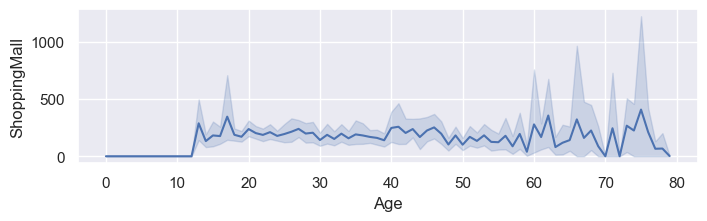

In [252]:
sns.lineplot(spl_train_data, x='Age', y='ShoppingMall')

#passengers from 12 y.o. to 60 y.o. are spending averagely 180 money to shopping
spl_train_data.loc[(spl_train_data['ShoppingMall'].isna()) & 
                   (spl_train_data['Age'] >= 12) & 
                   (spl_train_data['Age'] <= 60), 'ShoppingMall'] = 180

#passengedr 60+
median_value = statistics.median(spl_train_data[spl_train_data['Age'] >= 61]['ShoppingMall'].values)
spl_train_data.loc[(spl_train_data['ShoppingMall'].isna()) &  
                   (spl_train_data['Age'] >= 61), 'ShoppingMall'] = median_value

#passengedr from 0 to 11
spl_train_data.loc[(spl_train_data['ShoppingMall'].isna()) & 
                   (spl_train_data['Age'] < 12), 'ShoppingMall'] = 0

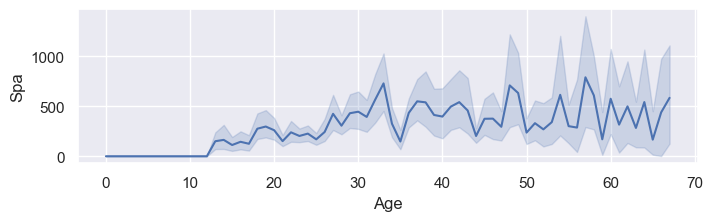

In [253]:
sns.lineplot(spl_train_data[spl_train_data['Age'] < 68], x='Age', y='Spa')

#passengers from 12 y.o. to 25 y.o. are spending averagely 250 money to Spa
spl_train_data.loc[(spl_train_data['Spa'].isna()) & 
                   (spl_train_data['Age'] >= 12) & 
                   (spl_train_data['Age'] <= 25), 'Spa'] = 250

#passengers from 26 y.o. to 68 y.o. are spending averagely 450 money to Spa
spl_train_data.loc[(spl_train_data['Spa'].isna()) & 
                   (spl_train_data['Age'] >= 26) & 
                   (spl_train_data['Age'] <= 68), 'Spa'] = 450

#passengedr 69+
median_value = statistics.median(spl_train_data[spl_train_data['Age'] >= 69]['Spa'].values)
spl_train_data.loc[(spl_train_data['Spa'].isna()) &  
                   (spl_train_data['Age'] >= 69), 'Spa'] = median_value

#passengedr from 0 to 11
spl_train_data.loc[(spl_train_data['Spa'].isna()) & 
                   (spl_train_data['Age'] < 12), 'Spa'] = 0

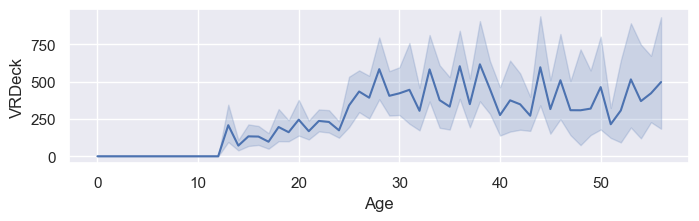

In [254]:
sns.lineplot(spl_train_data[spl_train_data['Age'] < 57], x='Age', y='VRDeck')

#passengers from 12 y.o. to 25 y.o. are spending averagely 200 money to VRDeck
spl_train_data.loc[(spl_train_data['VRDeck'].isna()) & 
                   (spl_train_data['Age'] >= 12) & 
                   (spl_train_data['Age'] <= 25), 'VRDeck'] = 250

#passengers from 25 y.o. to 56 y.o. are spending averagely 400 money to VRDeck
spl_train_data.loc[(spl_train_data['VRDeck'].isna()) & 
                   (spl_train_data['Age'] >= 26) & 
                   (spl_train_data['Age'] <= 56), 'VRDeck'] = 400

#passengedr 57+
median_value = statistics.median(spl_train_data[spl_train_data['Age'] >= 57]['VRDeck'].values)
spl_train_data.loc[(spl_train_data['VRDeck'].isna()) &  
                   (spl_train_data['Age'] >= 57), 'VRDeck'] = median_value

#passengedr from 0 to 11
spl_train_data.loc[(spl_train_data['VRDeck'].isna()) & 
                   (spl_train_data['Age'] < 12), 'VRDeck'] = 0

VIP

In [255]:
# vip status might depends on deck and room

vip_rooms = sorted(spl_train_data[spl_train_data['VIP'].isna()]['Room_num'].unique().tolist())

for i in vip_rooms:
    pop_val = spl_train_data[spl_train_data['Room_num']==i]['VIP'].value_counts().index
    if len(pop_val) > 0:
        spl_train_data.loc[(spl_train_data['VIP'].isna()) & 
                           (spl_train_data['Room_num']==i), 'VIP'] = pop_val[0]
        
# others
spl_train_data.loc[spl_train_data['VIP'].isna(), 'VIP'] = spl_train_data['VIP'].value_counts().index[0]

Destination

In [256]:
spl_train_data = spl_train_data.astype({'PassengerId_in_group':int,
                                            'Room_num':int,
                                            'Age':int,
                                            'RoomService':int,
                                            'FoodCourt':int,
                                            'ShoppingMall':int,
                                            'Spa':int,
                                            'VRDeck':int})

enc_spl_train_data = spl_train_data.drop(['First_name', 'Last_name', 'Transported'], axis=1)

# encoding
enc_spl_train_data[['HomePlanet','CryoSleep',
                    'Deck_num','Bord_side',
                    'Destination','VIP']] = enc_spl_train_data[['HomePlanet','CryoSleep',
                                                                'Deck_num','Bord_side',
                                                                'Destination','VIP']].apply(LabelEncoder().fit_transform)


df = enc_spl_train_data.dropna(axis=0)

In [257]:
#RandomForestClassifier

X = df.drop('Destination', axis=1)
y = df['Destination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(max_depth=4, random_state=None)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6864456079115765


In [258]:
#LogisticRegression

X = df.drop('Destination', axis=1)
y = df['Destination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6858638743455497


D:\Yuliya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [259]:
#DecisionTreeClassifier

X = df.drop('Destination', axis=1)
y = df['Destination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt = DecisionTreeClassifier(max_depth=5, random_state=None)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.702152414194299


In [268]:
# better model - RandomForestClassifier (70% accuracy is not fine, but in that situation - ok)

X = enc_spl_train_data.drop('Destination', axis=1)
y_pred = rf.predict(X)

destination_list = enc_spl_train_data['Destination'].tolist()
destination_rf_list = y_pred.tolist()
destination = []

for i in range(0, enc_spl_train_data.shape[0]):
    if destination_list[i] != 3:
        destination.append(destination_list[i])
    else:
        destination.append(destination_rf_list[i])
        
enc_spl_train_data['Destination'] = destination

#replece int to string
spl_train_data['Destination'] = enc_spl_train_data['Destination']
spl_train_data['Destination'] = spl_train_data['Destination'].replace({0:'Cancri e',
                                                                       1:'PSO J318', 
                                                                       2:'TRAPPIST-1e'})

In [269]:
spl_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8594 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger_trav_group  8594 non-null   int64 
 1   PassengerId_in_group  8594 non-null   int32 
 2   HomePlanet            8594 non-null   object
 3   CryoSleep             8594 non-null   object
 4   Deck_num              8594 non-null   object
 5   Room_num              8594 non-null   int32 
 6   Bord_side             8594 non-null   object
 7   Destination           8594 non-null   object
 8   Age                   8594 non-null   int32 
 9   VIP                   8594 non-null   object
 10  RoomService           8594 non-null   int32 
 11  FoodCourt             8594 non-null   int32 
 12  ShoppingMall          8594 non-null   int32 
 13  Spa                   8594 non-null   int32 
 14  VRDeck                8594 non-null   int32 
 15  First_name            8594 non-null   

## NANS test_data

HomePlanet

In [271]:
spl_test_data['HomePlanet'] = spl_test_data['HomePlanet'].apply(lambda x: 'Earth' if x == 'Europa' else x)

C:\Users\Yulia\AppData\Local\Temp\ipykernel_30068\3959156436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl_test_data['HomePlanet'] = spl_test_data['HomePlanet'].apply(lambda x: 'Earth' if x == 'Europa' else x)


In [272]:
# family members are living at the same planet

spl_test_data['Passenger_trav_group'] = spl_test_data['Passenger_trav_group'].apply(lambda x: int(x))

miss_val = spl_test_data[spl_test_data['HomePlanet'].isna()]['Passenger_trav_group'].unique()
for i in miss_val:
    #take populariest value or (if values are similar) random
    pop_val = spl_test_data[(~spl_test_data['HomePlanet'].isna()) & 
                             (spl_test_data['Passenger_trav_group']==i)]['HomePlanet'].value_counts()
    if len(pop_val) > 0:
        spl_test_data.loc[(spl_test_data['HomePlanet'].isna()) & 
                           (spl_test_data['Passenger_trav_group']==i), 'HomePlanet'] = pop_val.index[0]
    else:
        spl_test_data.loc[spl_test_data['HomePlanet'].isna() & 
                          (spl_test_data['Passenger_trav_group']==i), 'HomePlanet'] = 'Earth'   # the most popular in dataframe

C:\Users\Yulia\AppData\Local\Temp\ipykernel_30068\2229711453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl_test_data['Passenger_trav_group'] = spl_test_data['Passenger_trav_group'].apply(lambda x: int(x))


CryoSleep

In [273]:
spl_test_data[spl_test_data['CryoSleep'] == True]['FoodCourt'].unique()

array([ 0., nan])

In [274]:
# fill food nans, because cryo peoples don't need food
spl_test_data.loc[(spl_test_data['CryoSleep'] == True) & 
                   (spl_test_data['FoodCourt'].isna()), 'FoodCourt'] = 0

In [275]:
spl_test_data.loc[(spl_test_data['CryoSleep'].isna()) & 
                   (~spl_test_data['FoodCourt'].isna()) & 
                   (spl_test_data['FoodCourt'] > 0), 'CryoSleep'] = False

spl_test_data.loc[(spl_test_data['CryoSleep'].isna()) & 
                   (spl_test_data['FoodCourt'] == 0), 'CryoSleep'] = True

In [276]:
spl_test_data['CryoSleep'].value_counts(dropna=False)

False    2671
True     1606
Name: CryoSleep, dtype: int64

Deck_num, Room_num and Bord_side

In [277]:
spl_test_data['Room_num'] = spl_test_data['Room_num'].apply(lambda x: x if pd.isnull(x)==True else float(x))

C:\Users\Yulia\AppData\Local\Temp\ipykernel_30068\1603591576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl_test_data['Room_num'] = spl_test_data['Room_num'].apply(lambda x: x if pd.isnull(x)==True else float(x))


In [278]:
spl_test_data['Bord_side'].value_counts(dropna=False)  #if we fill nans by pop value then it may affect to wrong distribution

right    2093
left     2084
NaN       100
Name: Bord_side, dtype: int64

In [279]:
# it can depends on Passenger_trav_group, because family memebers would be checking into same roomes

right_board_pass = sorted(spl_test_data[spl_test_data['Bord_side'] == 'right']['Passenger_trav_group'].unique().tolist())
left_board_pass = sorted(spl_test_data[spl_test_data['Bord_side'] == 'left']['Passenger_trav_group'].unique().tolist())

right_board_pass == left_board_pass

False

In [280]:
spl_test_data.loc[spl_test_data['Bord_side'].isna() & 
                  (spl_test_data['Passenger_trav_group'].isin(right_board_pass)), 'Bord_side'] = 'right'
    
spl_test_data.loc[spl_test_data['Bord_side'].isna() & 
                  (spl_test_data['Passenger_trav_group'].isin(left_board_pass)), 'Bord_side'] = 'left'

In [281]:
spl_test_data[spl_test_data['Bord_side'].isna()]['Passenger_trav_group'].unique()

# some passengers didn't check into room

array([ 227,  293,  323,  509,  574,  739, 1692, 1716, 2113, 2199, 2331,
       2514, 2539, 2849, 3157, 3367, 3599, 3730, 3957, 4100, 4375, 4389,
       4636, 4805, 4869, 4953, 4976, 5022, 5075, 5270, 5400, 5449, 5558,
       6060, 6505, 6518, 6527, 6696, 6791, 6919, 7023, 7123, 7125, 7183,
       7265, 7368, 7440, 7463, 7469, 7732, 7804, 7948, 8269, 8311, 8490,
       8914, 8963, 8984, 9058, 9138, 9223, 9269], dtype=int64)

In [282]:
# find what rooms are missing
rooms_dict = {'A': (),
              'B': (),
              'C': (),
              'D': (),
              'E': (),
              'F': (),
              'G': (),
              'T': ()}

for i in sorted(spl_test_data['Deck_num'].value_counts().index.tolist()):
    deck_rooms_list = sorted(spl_test_data[spl_test_data['Deck_num'] == i]['Room_num'].unique().tolist())
    min_room = int(deck_rooms_list[0])
    max_room = int(deck_rooms_list[-1])
    
    rooms_list = list(range(min_room, max_room+1))
    miss_rooms = sorted(list(set(rooms_list)-set(deck_rooms_list)))
    
    if len(miss_rooms) > 0:
        rooms_dict[i] = miss_rooms

In [283]:
# Let's checking into other passengers

passengers_without_rooms = sorted(spl_test_data[spl_test_data['Room_num'].isna()]['Passenger_trav_group'].unique())

c = 0
for deck in sorted(list(rooms_dict.keys())):
    for room in rooms_dict[deck]:
        if passengers_without_rooms[c] < passengers_without_rooms[-1]:
            pas = passengers_without_rooms[c]
            c += 1
            # fill info
            spl_test_data.loc[(spl_test_data['Passenger_trav_group'] == pas) & 
                               (spl_test_data['Room_num'].isna()) & 
                               (spl_test_data['Deck_num'].isna()), ['Room_num', 'Deck_num']] = room, deck
            
        else:
            pas = passengers_without_rooms[c]
            # fill info
            spl_test_data.loc[(spl_test_data['Passenger_trav_group'] == pas) & 
                               (spl_test_data['Room_num'].isna()) & 
                               (spl_test_data['Deck_num'].isna()), ['Room_num', 'Deck_num']] = room, deck
            break
            
spl_test_data['Room_num'] = spl_test_data['Room_num'].astype(int)

C:\Users\Yulia\AppData\Local\Temp\ipykernel_30068\1697575314.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl_test_data['Room_num'] = spl_test_data['Room_num'].astype(int)


In [284]:
spl_test_data['Bord_side'].value_counts(dropna=False)

right    2111
left     2103
NaN        63
Name: Bord_side, dtype: int64

In [285]:
# drop Bord_side nans (~0.03%)
spl_test_data =spl_test_data[~spl_test_data['Bord_side'].isna()]

First_name, Last_name

In [286]:
spl_test_data[['First_name', 'Last_name']] = spl_test_data[['First_name', 'Last_name']].fillna('unknown')

Age

In [287]:
# get median Age for every home planet (because people can want to buy ticket like their friends)
med_earth = statistics.median(spl_test_data[spl_test_data['HomePlanet']=='Earth']['Age'].values)
med_mars = statistics.median(spl_test_data[spl_test_data['HomePlanet']=='Mars']['Age'].values)

spl_test_data.loc[(spl_test_data['Age'].isna()) & 
                   (spl_test_data['HomePlanet']=='Earth'), 'Age'] = med_earth

spl_test_data.loc[(spl_test_data['Age'].isna()) & 
                   (spl_test_data['HomePlanet']=='Mars'), 'Age'] = med_mars

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [288]:
sns.set_theme(rc={'figure.figsize':(8,2)})

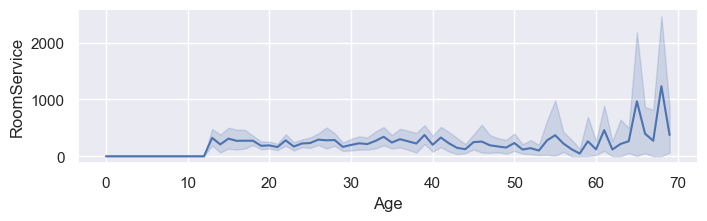

In [289]:
sns.lineplot(spl_test_data[spl_test_data['Age'] < 70], x='Age', y='RoomService')

#passengers from 12 y.o. to 64 y.o. are spending averagely 250 money to RoomService
spl_test_data.loc[(spl_test_data['RoomService'].isna()) & 
                   (spl_test_data['Age'] >= 12) & 
                   (spl_test_data['Age'] <= 64), 'RoomService'] = 250

#passengedr 65+
median_value = statistics.median(spl_test_data[spl_test_data['Age'] >= 65]['RoomService'].values)
spl_test_data.loc[(spl_test_data['RoomService'].isna()) &  
                   (spl_test_data['Age'] >= 65), 'RoomService'] = median_value

#passengedr from 0 to 11
spl_test_data.loc[(spl_test_data['RoomService'].isna()) & 
                   (spl_test_data['Age'] < 12), 'RoomService'] = 0

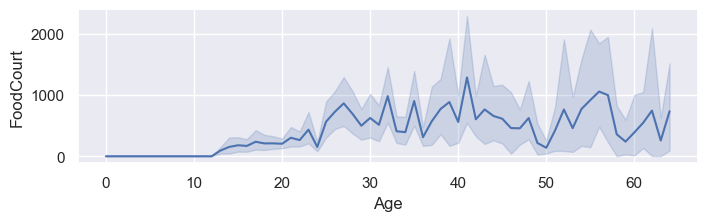

In [290]:
sns.lineplot(spl_test_data[spl_test_data['Age'] < 65], x='Age', y='FoodCourt')

#passengers from 12 y.o. to 23 y.o. are spending averagely 250 money to FoodCourt
spl_test_data.loc[(spl_test_data['FoodCourt'].isna()) & 
                   (spl_test_data['Age'] >= 12) & 
                   (spl_test_data['Age'] <= 23), 'FoodCourt'] = 800

#passengers from 24 y.o. to 43 y.o. are spending averagely 700 money to FoodCourt
spl_test_data.loc[(spl_test_data['FoodCourt'].isna()) & 
                   (spl_test_data['Age'] >= 24) & 
                   (spl_test_data['Age'] <= 43), 'FoodCourt'] = 700

#passengedr 44+
avg_value = round(spl_test_data[spl_test_data['Age'] >= 44]['FoodCourt'].mean())
spl_test_data.loc[(spl_test_data['FoodCourt'].isna()) &  
                   (spl_test_data['Age'] >= 44), 'FoodCourt'] = avg_value

#passengedr from 0 to 11
spl_test_data.loc[(spl_test_data['FoodCourt'].isna()) & 
                   (spl_test_data['Age'] < 12), 'FoodCourt'] = 0

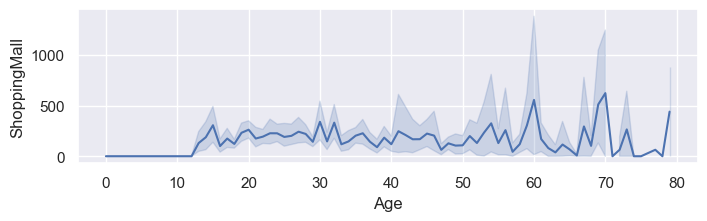

In [291]:
sns.lineplot(spl_test_data, x='Age', y='ShoppingMall')

#passengers from 12 y.o. to 59 y.o. are spending averagely 230 money to shopping
spl_test_data.loc[(spl_test_data['ShoppingMall'].isna()) & 
                   (spl_test_data['Age'] >= 12) & 
                   (spl_test_data['Age'] <= 59), 'ShoppingMall'] = 230

#passengedr 60+
median_value = statistics.median(spl_test_data[spl_test_data['Age'] >= 60]['ShoppingMall'].values)
spl_test_data.loc[(spl_test_data['ShoppingMall'].isna()) &  
                   (spl_test_data['Age'] >= 60), 'ShoppingMall'] = median_value

#passengedr from 0 to 11
spl_test_data.loc[(spl_test_data['ShoppingMall'].isna()) & 
                   (spl_test_data['Age'] < 12), 'ShoppingMall'] = 0

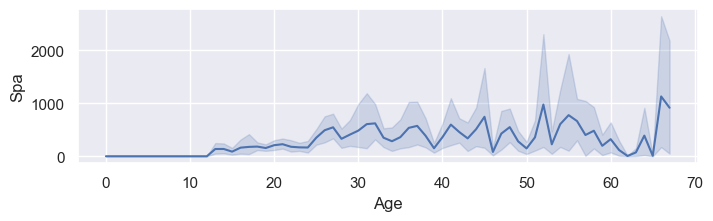

In [292]:
sns.lineplot(spl_test_data[spl_test_data['Age'] < 68], x='Age', y='Spa')

#passengers from 12 y.o. to 23 y.o. are spending averagely 150 money to Spa
spl_test_data.loc[(spl_test_data['Spa'].isna()) & 
                   (spl_test_data['Age'] >= 12) & 
                   (spl_test_data['Age'] <= 23), 'Spa'] = 150

#passengers from 24 y.o. to 59 y.o. are spending averagely 500 money to Spa
spl_test_data.loc[(spl_test_data['Spa'].isna()) & 
                   (spl_test_data['Age'] >= 24) & 
                   (spl_test_data['Age'] <= 59), 'Spa'] = 500

#passengedr 60+
median_value = statistics.median(spl_test_data[spl_test_data['Age'] >= 69]['Spa'].values)
spl_test_data.loc[(spl_test_data['Spa'].isna()) &  
                   (spl_test_data['Age'] >= 60), 'Spa'] = median_value

#passengedr from 0 to 11
spl_test_data.loc[(spl_test_data['Spa'].isna()) & 
                   (spl_test_data['Age'] < 12), 'Spa'] = 0

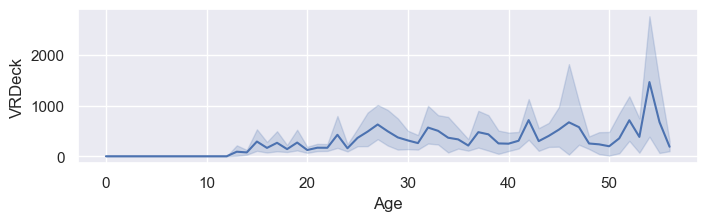

In [293]:
sns.lineplot(spl_test_data[spl_test_data['Age'] < 57], x='Age', y='VRDeck')

#passengers from 12 y.o. to 23 y.o. are spending averagely 200 money to VRDeck
spl_test_data.loc[(spl_test_data['VRDeck'].isna()) & 
                   (spl_test_data['Age'] >= 12) & 
                   (spl_test_data['Age'] <= 23), 'VRDeck'] = 200

#passengers from 24 y.o. to 52 y.o. are spending averagely 400 money to VRDeck
spl_test_data.loc[(spl_test_data['VRDeck'].isna()) & 
                   (spl_test_data['Age'] >= 24) & 
                   (spl_test_data['Age'] <= 52), 'VRDeck'] = 400

#passengedr 53+
median_value = statistics.median(spl_test_data[spl_test_data['Age'] >= 57]['VRDeck'].values)
spl_test_data.loc[(spl_test_data['VRDeck'].isna()) &  
                   (spl_test_data['Age'] >= 53), 'VRDeck'] = median_value

#passengedr from 0 to 11
spl_test_data.loc[(spl_test_data['VRDeck'].isna()) & 
                   (spl_test_data['Age'] < 12), 'VRDeck'] = 0

VIP

In [294]:
# vip status might depends on deck and room

vip_rooms = sorted(spl_test_data[spl_test_data['VIP'].isna()]['Room_num'].unique().tolist())

for i in vip_rooms:
    pop_val = spl_test_data[spl_test_data['Room_num']==i]['VIP'].value_counts().index
    if len(pop_val) > 0:
        spl_test_data.loc[(spl_test_data['VIP'].isna()) & 
                           (spl_test_data['Room_num']==i), 'VIP'] = pop_val[0]
        
# others
spl_test_data.loc[spl_test_data['VIP'].isna(), 'VIP'] = spl_test_data['VIP'].value_counts().index[0]

Destination

In [295]:
spl_test_data = spl_test_data.astype({'PassengerId_in_group':int,
                                      'Room_num':int,
                                      'Age':int,
                                      'RoomService':int,
                                      'FoodCourt':int,
                                      'ShoppingMall':int,
                                      'Spa':int,
                                      'VRDeck':int})

enc_spl_test_data = spl_test_data.drop(['First_name', 'Last_name'], axis=1)

# encoding
enc_spl_test_data[['HomePlanet','CryoSleep',
                    'Deck_num','Bord_side',
                    'Destination','VIP']] = enc_spl_test_data[['HomePlanet','CryoSleep',
                                                                'Deck_num','Bord_side',
                                                                'Destination','VIP']].apply(LabelEncoder().fit_transform)


df = enc_spl_test_data.dropna(axis=0)

In [296]:
#RandomForestClassifier

X = df.drop('Destination', axis=1)
y = df['Destination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(max_depth=8, random_state=None)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6737841043890866


In [297]:
#LogisticRegression

X = df.drop('Destination', axis=1)
y = df['Destination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6714116251482799


D:\Yuliya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [298]:
#DecisionTreeClassifier

X = df.drop('Destination', axis=1)
y = df['Destination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt = DecisionTreeClassifier(max_depth=5, random_state=None)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7022538552787663


In [301]:
# better model - RandomForestClassifier (~70% accuracy is not fine, but in that situation - ok)

X = enc_spl_test_data.drop('Destination', axis=1)
y_pred = rf.predict(X)

destination_list = enc_spl_test_data['Destination'].tolist()
destination_rf_list = y_pred.tolist()
destination = []

for i in range(0, enc_spl_test_data.shape[0]):
    if destination_list[i] != 3:
        destination.append(destination_list[i])
    else:
        destination.append(destination_rf_list[i])

enc_spl_test_data['Destination'] = destination

#replece int to string
spl_test_data['Destination'] = enc_spl_test_data['Destination']
spl_test_data['Destination'] = spl_test_data['Destination'].replace({0:'Cancri e',
                                                                     1:'PSO J318', 
                                                                     2:'TRAPPIST-1e'})

In [303]:
spl_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4214 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger_trav_group  4214 non-null   int64 
 1   PassengerId_in_group  4214 non-null   int32 
 2   HomePlanet            4214 non-null   object
 3   CryoSleep             4214 non-null   object
 4   Deck_num              4214 non-null   object
 5   Room_num              4214 non-null   int32 
 6   Bord_side             4214 non-null   object
 7   Destination           4214 non-null   object
 8   Age                   4214 non-null   int32 
 9   VIP                   4214 non-null   object
 10  RoomService           4214 non-null   int32 
 11  FoodCourt             4214 non-null   int32 
 12  ShoppingMall          4214 non-null   int32 
 13  Spa                   4214 non-null   int32 
 14  VRDeck                4214 non-null   int32 
 15  First_name            4214 non-null   

# Save prepared frames

In [167]:
spl_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8594 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger_trav_group  8594 non-null   int64 
 1   PassengerId_in_group  8594 non-null   int32 
 2   HomePlanet            8594 non-null   object
 3   CryoSleep             8594 non-null   object
 4   Deck_num              8594 non-null   object
 5   Room_num              8594 non-null   int32 
 6   Bord_side             8594 non-null   object
 7   Destination           8594 non-null   object
 8   Age                   8594 non-null   int32 
 9   VIP                   8594 non-null   object
 10  RoomService           8594 non-null   int32 
 11  FoodCourt             8594 non-null   int32 
 12  ShoppingMall          8594 non-null   int32 
 13  Spa                   8594 non-null   int32 
 14  VRDeck                8594 non-null   int32 
 15  First_name            8594 non-null   

In [168]:
spl_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4214 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger_trav_group  4214 non-null   int64 
 1   PassengerId_in_group  4214 non-null   int32 
 2   HomePlanet            4214 non-null   object
 3   CryoSleep             4214 non-null   object
 4   Deck_num              4214 non-null   object
 5   Room_num              4214 non-null   int32 
 6   Bord_side             4214 non-null   object
 7   Destination           4214 non-null   object
 8   Age                   4214 non-null   int32 
 9   VIP                   4214 non-null   object
 10  RoomService           4214 non-null   int32 
 11  FoodCourt             4214 non-null   int32 
 12  ShoppingMall          4214 non-null   int32 
 13  Spa                   4214 non-null   int32 
 14  VRDeck                4214 non-null   int32 
 15  First_name            4214 non-null   

In [304]:
spl_train_data.to_csv('data/prep_train_data.csv', index=False)
spl_test_data.to_csv('data/prep_test_data.csv', index=False)